Provenance
Execution environment documentation

In [ ]:
Provenance
Execution environment documentation

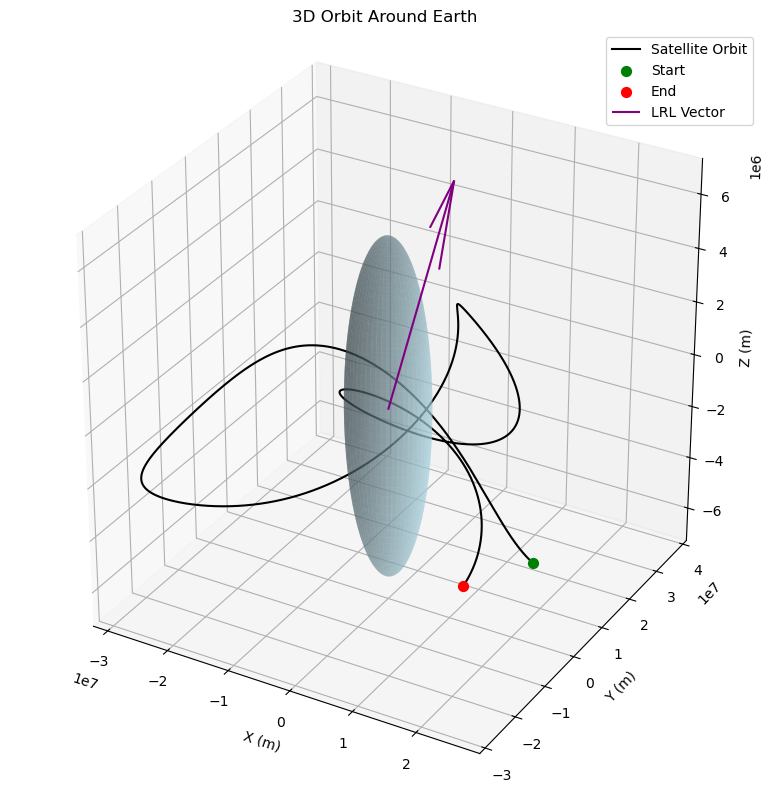

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np

# Satellite position
x, y, z = r_meters[:, 0], r_meters[:, 1], r_meters[:, 2]

# Earth radius in meters
R_earth = 6371e3

# Create Earth sphere (low-res for speed; increase 50→100 for smoother)
phi, theta = np.mgrid[0:np.pi:50j, 0:2*np.pi:50j]
earth_x = R_earth * np.sin(phi) * np.cos(theta)
earth_y = R_earth * np.sin(phi) * np.sin(theta)
earth_z = R_earth * np.cos(phi)

# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Earth
ax.plot_surface(earth_x, earth_y, earth_z, color='lightblue', alpha=0.5, linewidth=0)

# Orbit
ax.plot(x, y, z, color='black', label='Satellite Orbit')

# Start and end markers
ax.scatter(x[0], y[0], z[0], color='green', label='Start', s=50)
ax.scatter(x[-1], y[-1], z[-1], color='red', label='End', s=50)

# Optional: plot mean LRL vector
A_mean = np.mean(A, axis=0)
A_unit = A_mean / np.linalg.norm(A_mean)
scale = 2 * R_earth
ax.quiver(0, 0, 0, A_unit[0], A_unit[1], A_unit[2], length=scale, color='purple', label='LRL Vector')

# Formatting
ax.set_title("3D Orbit Around Earth")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")
ax.legend()
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
plt.tight_layout()
plt.show()